In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout

In [3]:
#從CSV檔中取得資料，儲存成二維度的df1
df1=pd.read_csv('new2013C2ALL.csv',encoding='big5')

FileNotFoundError: ignored

In [4]:
#查看df1部分資料
df1.head()

,stud_id,w2p103,w2p106,w2p107,w2p108,w2p109,w2p110,w2p111,w2p112,w2p113,...,w2p502,w2p503,w2p505,w2p507,w2p508,w2p509,w2p510,w2p511,w2p513,w2p515
0,1,已婚,民間信仰/道教,有時參加,偶爾一兩次,都沒有,很少或沒有,從來沒有,從來沒有,2次,...,受私人或公家單位僱用,生產、設備操作及體力工,製造或營造業,非主管工作,"20,001∼50,000元",有工作,受私人或公家單位僱用,生產、設備操作及體力工,製造或營造業,非主管工作
1,2,已婚,民間信仰/道教,偶爾一兩次,偶爾一兩次,偶爾一兩次,2小時以上，不滿4小時,從來沒有,2次,5次（含）以上,...,受私人或公家單位僱用,買賣服務或一般事務,製造或營造業,基層主管,"50,001∼100,000元",有工作,受私人或公家單位僱用,買賣服務或一般事務,商業,基層主管
2,3,離婚或分居,民間信仰/道教,有時參加,有時帶,都沒有,很少或沒有,從來沒有,從來沒有,從來沒有,...,受私人或公家單位僱用,其他職業,服務業,非主管工作,"20,001∼50,000元",有工作,受私人或公家單位僱用,其他職業,服務業,非主管工作
3,4,離婚或分居,民間信仰/道教,偶爾一兩次,偶爾一兩次,偶爾一兩次,2小時以上，不滿4小時,3次,3次,從來沒有,...,受私人或公家單位僱用,買賣服務或一般事務,商業,非主管工作,"20,001∼50,000元",未填答,未填答,未填答,未填答,未填答
4,5,離婚或分居,佛教,有時參加,有時帶,都沒有,很少或沒有,從來沒有,從來沒有,從來沒有,...,為自己工作（自僱），沒有僱用任何人,其他職業,農林漁牧礦業,非主管工作,"20,001∼50,000元",未填答,未填答,未填答,未填答,未填答


In [5]:
#查看總共有幾筆資料
len(df1)

18605

In [6]:
#從df1檔中讀取文化資本以及社會資本,儲存成df_basic
df_basics = pd.DataFrame(df1[["w2p103", "w2p106", "w2p107", "w2p108", "w2p109", "w2p110", "w2p111", "w2p112", "w2p113", "w2p114", "w2p502", "w2p503", "w2p505", "w2p507", "w2p508", "w2p509", "w2p510", "w2p511", "w2p513", "w2p515"]])
print(df_basics)

      w2p103   w2p106 w2p107 w2p108 w2p109       w2p110 w2p111 w2p112  \
0         已婚  民間信仰/道教   有時參加  偶爾一兩次    都沒有        很少或沒有   從來沒有   從來沒有   
1         已婚  民間信仰/道教  偶爾一兩次  偶爾一兩次  偶爾一兩次  2小時以上，不滿4小時   從來沒有     2次   
2      離婚或分居  民間信仰/道教   有時參加    有時帶    都沒有        很少或沒有   從來沒有   從來沒有   
3      離婚或分居  民間信仰/道教  偶爾一兩次  偶爾一兩次  偶爾一兩次  2小時以上，不滿4小時     3次     3次   
4      離婚或分居       佛教   有時參加    有時帶    都沒有        很少或沒有   從來沒有   從來沒有   
...      ...      ...    ...    ...    ...          ...    ...    ...   
18600     已婚  民間信仰/道教   從不參加    從不帶     有時        8小時以上   從來沒有   從來沒有   
18601     已婚       佛教   從不參加    從不帶    都沒有        很少或沒有   從來沒有   從來沒有   
18602     已婚  民間信仰/道教   有時參加    從不帶     有時        很少或沒有   從來沒有   從來沒有   
18603     已婚  民間信仰/道教   經常參加    從不帶     經常        8小時以上   從來沒有   從來沒有   
18604     已婚       沒有   有時參加    從不帶     經常        8小時以上     4次     3次   

        w2p113    w2p114             w2p502       w2p503         w2p505  \
0           2次      1∼2次         受私人或公家單位僱用  生產、

In [7]:
#使用無順序的類別型資料，如：性別、婚姻狀態
from sklearn.preprocessing import OneHotEncoder
#對於没有出现在訓練集中的類別，轉換時全用0替代
enc = OneHotEncoder(handle_unknown='ignore')

In [8]:
#將df_basic的文字內容進行編碼，以數字替代
enc.fit_transform(df_basics)

<18605x155 sparse matrix of type '<class 'numpy.float64'>'
	with 372100 stored elements in Compressed Sparse Row format>

In [9]:
#查看各個特徵中有哪些類別(例：婚姻狀態有- 合理值、其他、同居、已婚、未填答、配偶已過世、離婚或分居。
enc.categories_
#print(enc)

[array(['不合理值', '其他', '同居', '已婚', '未填答', '配偶已過世', '離婚或分居'], dtype=object),
 array(['不合理值', '佛教', '其他', '基督教', '天主教', '未填答', '民間信仰/道教', '沒有'],
       dtype=object),
 array(['不合理值', '偶爾一兩次', '從不參加', '有時參加', '未填答', '經常參加'], dtype=object),
 array(['不合理值', '偶爾一兩次', '從不帶', '有時帶', '未填答', '經常帶'], dtype=object),
 array(['不合理值', '偶爾一兩次', '有時', '未填答', '經常', '都沒有'], dtype=object),
 array(['2小時以上，不滿4小時', '4到6小時(不含6小時)', '6到8小時(不含8小時)', '8小時以上', '不合理值',
        '不滿2小時', '很少或沒有', '未填答'], dtype=object),
 array(['1次', '2次', '3次', '4次', '5次（含）以上', '不合理值', '從來沒有', '未填答'],
       dtype=object),
 array(['1次', '2次', '3次', '4次', '5次（含）以上', '不合理值', '從來沒有', '未填答'],
       dtype=object),
 array(['1次', '2次', '3次', '4次', '5次（含）以上', '不合理值', '從來沒有', '未填答'],
       dtype=object),
 array(['13次（含）以上', '1∼2次', '3∼4次', '5∼6次', '7∼12次', '從來沒有', '未填答'],
       dtype=object),
 array(['不合理值', '受私人或公家單位僱用', '從來沒有工作過', '未填答', '為自己家裡工作，但不是負責人或老闆',
        '為自己工作（自僱），並僱用九位以下領薪水的員工', '為自己工作（自僱），並僱用含十位以上領薪水的員工',
        '為自己工作（自僱

In [10]:
#把資料轉換成二元資料
X = enc.transform(df_basics).toarray()
X.shape

(18605, 155)

In [11]:
#查看df_basics轉換前的資料型態
print(df_basics)

      w2p103   w2p106 w2p107 w2p108 w2p109       w2p110 w2p111 w2p112  \
0         已婚  民間信仰/道教   有時參加  偶爾一兩次    都沒有        很少或沒有   從來沒有   從來沒有   
1         已婚  民間信仰/道教  偶爾一兩次  偶爾一兩次  偶爾一兩次  2小時以上，不滿4小時   從來沒有     2次   
2      離婚或分居  民間信仰/道教   有時參加    有時帶    都沒有        很少或沒有   從來沒有   從來沒有   
3      離婚或分居  民間信仰/道教  偶爾一兩次  偶爾一兩次  偶爾一兩次  2小時以上，不滿4小時     3次     3次   
4      離婚或分居       佛教   有時參加    有時帶    都沒有        很少或沒有   從來沒有   從來沒有   
...      ...      ...    ...    ...    ...          ...    ...    ...   
18600     已婚  民間信仰/道教   從不參加    從不帶     有時        8小時以上   從來沒有   從來沒有   
18601     已婚       佛教   從不參加    從不帶    都沒有        很少或沒有   從來沒有   從來沒有   
18602     已婚  民間信仰/道教   有時參加    從不帶     有時        很少或沒有   從來沒有   從來沒有   
18603     已婚  民間信仰/道教   經常參加    從不帶     經常        8小時以上   從來沒有   從來沒有   
18604     已婚       沒有   有時參加    從不帶     經常        8小時以上     4次     3次   

        w2p113    w2p114             w2p502       w2p503         w2p505  \
0           2次      1∼2次         受私人或公家單位僱用  生產、

In [12]:
#查看df_basics轉換後的資料型態
print(X)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:
#從df1中讀取學生學習成就，61是所有數據中的最高值
y=df1["w2nright"].values/61

In [14]:
# create the Neural Network Model 設定神經網路參數，產生順序模型
model = Sequential()
model.add(Dense(units=256, activation='relu', input_dim=155))

In [15]:
#斷開10%的神經元
model.add(Dropout(0.1))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=256, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(1))

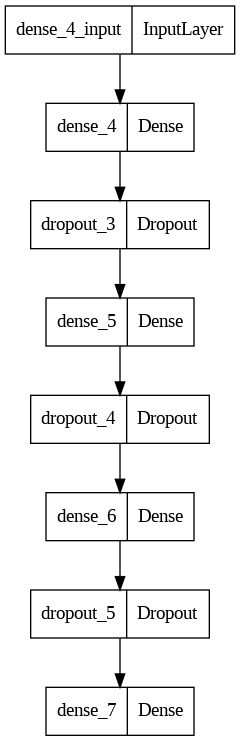

In [16]:
#列印順序模型結構圖
tf.keras.utils.plot_model(model, to_file='model.png')

In [17]:
#fit the Neural Network Model
model.compile(loss='mean_squared_error', optimizer='RMSprop')
model.fit(X, y, epochs=256, batch_size=256, verbose=1)

Epoch 1/256
73/73 [==============================] - 2s 12ms/step - loss: 0.2789
Epoch 2/256
73/73 [==============================] - 1s 11ms/step - loss: 0.0459
Epoch 3/256
73/73 [==============================] - 1s 11ms/step - loss: 0.0375
Epoch 4/256
73/73 [==============================] - 1s 11ms/step - loss: 0.0352
Epoch 5/256
73/73 [==============================] - 1s 12ms/step - loss: 0.0339
Epoch 6/256
73/73 [==============================] - 1s 11ms/step - loss: 0.0333
Epoch 7/256
73/73 [==============================] - 1s 11ms/step - loss: 0.0327
Epoch 8/256
73/73 [==============================] - 1s 11ms/step - loss: 0.0319
Epoch 9/256
73/73 [==============================] - 1s 11ms/step - loss: 0.0318
Epoch 10/256
73/73 [==============================] - 1s 11ms/step - loss: 0.0312
Epoch 11/256
73/73 [==============================] - 1s 11ms/step - loss: 0.0310
Epoch 12/256
73/73 [==============================] - 1s 11ms/step - loss: 0.0306
Epoch 13/256
73/73 [=====

In [18]:
# 顯示訓練成果(分數)
scores=model.evaluate(X,y) 

582/582 [==============================] - 2s 3ms/step - loss: 0.0159


In [19]:
# 預測(prediction)
df_test=pd.read_csv('X_test.csv',encoding='big5')
df_test_basics = pd.DataFrame(df_test[["w2p103", "w2p106", "w2p107", "w2p108", "w2p109", "w2p110", "w2p111", "w2p112", "w2p113", "w2p114", "w2p502", "w2p503", "w2p505", "w2p507", "w2p508", "w2p509", "w2p510", "w2p511", "w2p513", "w2p515"]])

In [20]:
#print(df_test_basics)
enc_test = OneHotEncoder(handle_unknown='ignore')
enc_test.fit_transform(df_test_basics)
X_test = enc.transform(df_test_basics).toarray()

In [1]:
#X_test.shape
predictions = (model.predict(X_test) > 0.5).astype("int32")
predictions=model.predict(X_test)
print(predictions*100)

NameError: ignored